In [60]:
%matplotlib inline
import json 
import subprocess
import pandas as pd
from io import StringIO
from datetime import datetime
import matplotlib.pyplot as plt

def monitor(subscription_id):
    bashCmd = ["az","vm","list","--subscription",subscription_id,"-d","-o","tsv","--query","[?powerState=='VM running'].{resource:resourceGroup, name:name}"]
    process = subprocess.Popen(bashCmd, stdout=subprocess.PIPE)
    
    data, error = process.communicate()
    if error:
        return error

    data = pd.read_csv(StringIO(data.decode("utf-8")), sep='\t', header=None)
    return data

def get_cpu_consumption(subscription_id,rg,vm):

    args = ["az","vm", "monitor", "metrics", "tail", "--subscription", subscription_id, "--name", vm, "--resource-group", rg, "--metric", 'Percentage CPU']

    process = subprocess.Popen(args, stdout=subprocess.PIPE)
    out, err = process.communicate()
    d = json.loads(out)
    
    time = []
    cpu = []

    datetime_object = datetime.strptime('Jun 1 2005  1:33PM', '%b %d %Y %I:%M%p')

    for el in d["value"]:
        for e in el["timeseries"]:
            for i in e["data"]:
                avg = i["average"]
                t = datetime.strptime(i["timeStamp"].split("+")[0],'%Y-%m-%dT%H:%M:%S')
                cpu.append(avg)
                time.append(t)
    axes = plt.gca()
    axes.set_ylim([0,100])
    plt.plot(time,cpu)
    plt.gcf().autofmt_xdate()

    plt.show()  

In [63]:
subscription_id = ""
data = monitor(subscription_id)
data.head()

,0,1
0,SG-NEW-RG,biggerdsvm
1,SG-NEW-RG,sgdsvm
2,VISIONWITHMACHINES,visionwithmachines-GPU
3,LIVINGWITHMACHINES,lwm-embeddings
4,CROWDSOURCING-NEWSPAPERS-GT,gtolfo-vm


SG-NEW-RG biggerdsvm


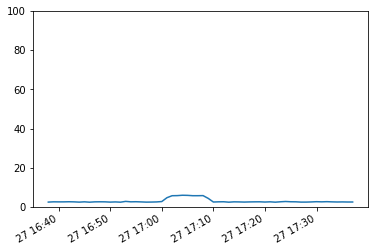

SG-NEW-RG sgdsvm


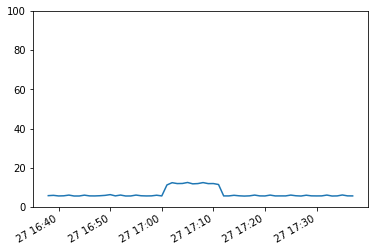

VISIONWITHMACHINES visionwithmachines-GPU


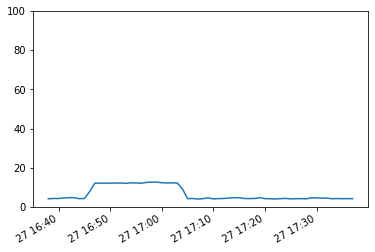

LIVINGWITHMACHINES lwm-embeddings


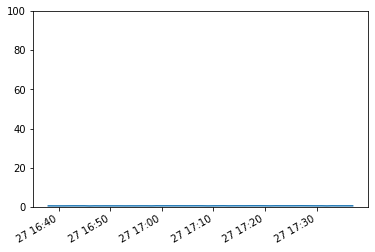

CROWDSOURCING-NEWSPAPERS-GT gtolfo-vm


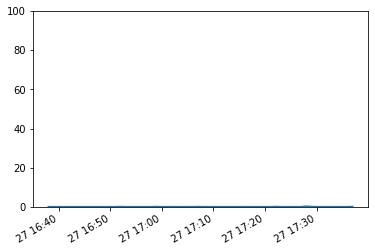

NEWSPAPERS_INGEST newspapersingest


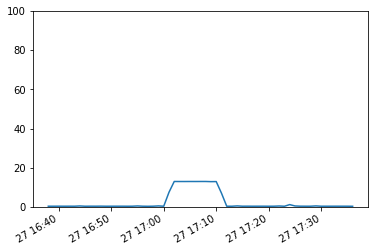

VISIONWITHMACHINES-JUPYTERHUB TLJH-Ubuntu


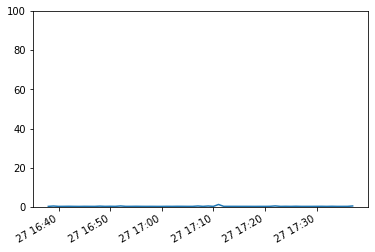

In [65]:
for idx, row in data.iterrows():
    print (row[0],row[1])
    get_cpu_consumption(subscription_id, row[0],row[1])
